<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/ResamplingShiftExpand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates

In [11]:
data = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/starbucks.csv", index_col="Date", parse_dates=True)
data.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [12]:
data.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [14]:
data.describe()

,Close,Volume
count,1006.000000,1.006000e+03
mean,54.070133,9.617402e+06
std,4.849600,4.986199e+06
min,36.974800,2.215418e+06
25%,52.170075,6.828217e+06
50%,54.631600,8.338076e+06
75%,56.603475,1.091071e+07
max,68.353000,6.209107e+07


In [15]:
data.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

**Resample**

In [16]:
# Daily Data to Yearly Data
data.resample(rule='A').mean() # A - year and frequency

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [17]:
def first_day(entry):
    """ Take an entry from dataframe
        return first day values
    """
    if len(entry):
        return entry[0]

In [18]:
data.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


**Resample And Visualize**

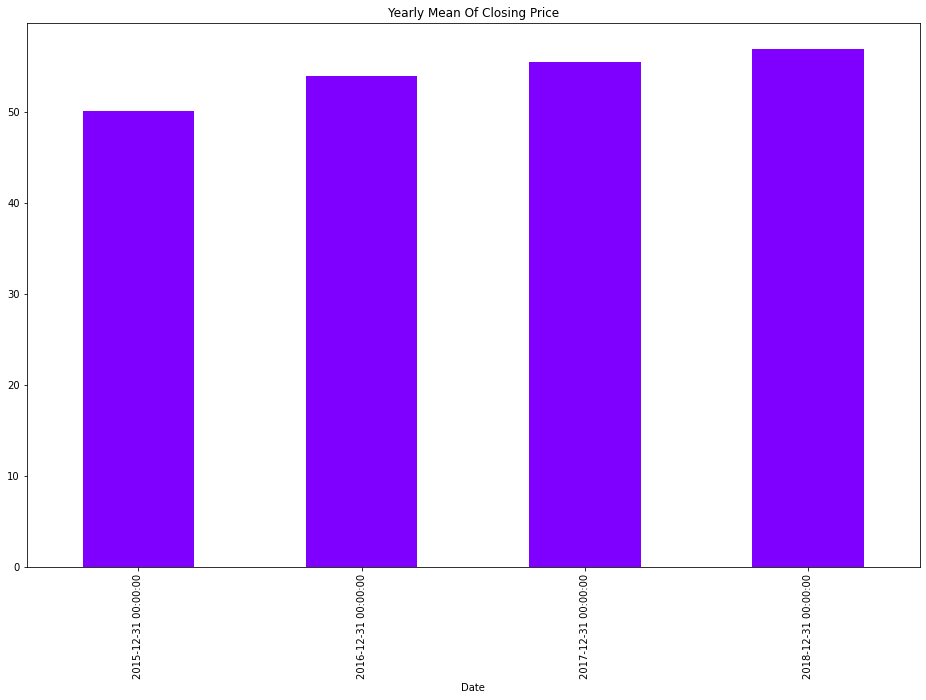

In [23]:
plt.figure(figsize=(16,10))
data['Close'].resample(rule='A').mean().plot.bar(title="Yearly Mean Of Closing Price", colormap='rainbow')

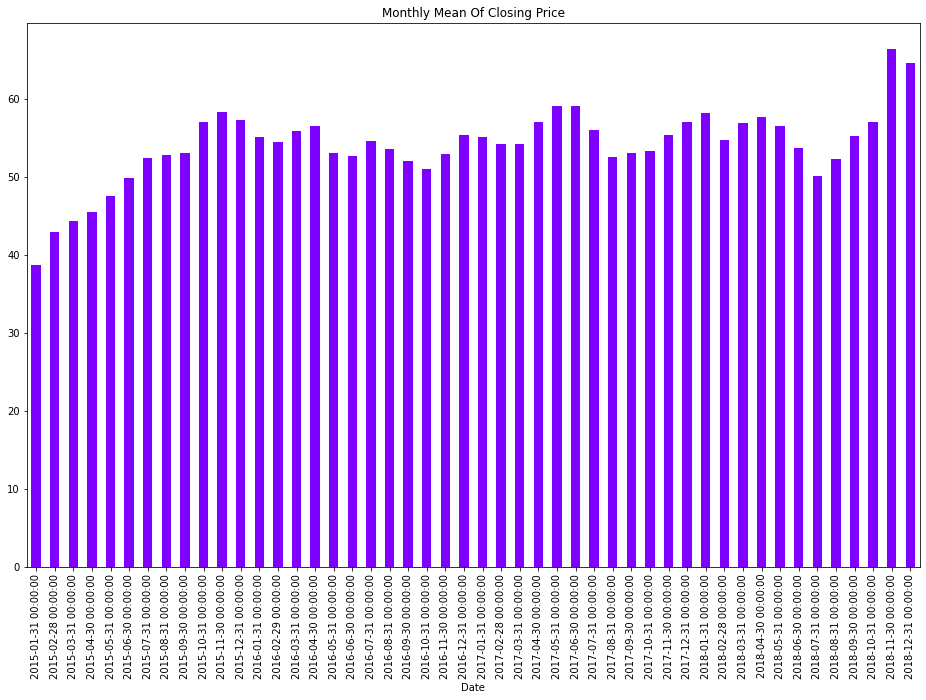

In [37]:
plt.figure(figsize=(16,10))
data['Close'].resample(rule='M').mean().plot(kind='bar', title="Monthly Mean Of Closing Price", colormap='rainbow')

**Time Shifting**

In [38]:
data.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [42]:
data.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [40]:
data.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [41]:
data.shift(1).tail() # loosing last row

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


**Rolling And Expanding**

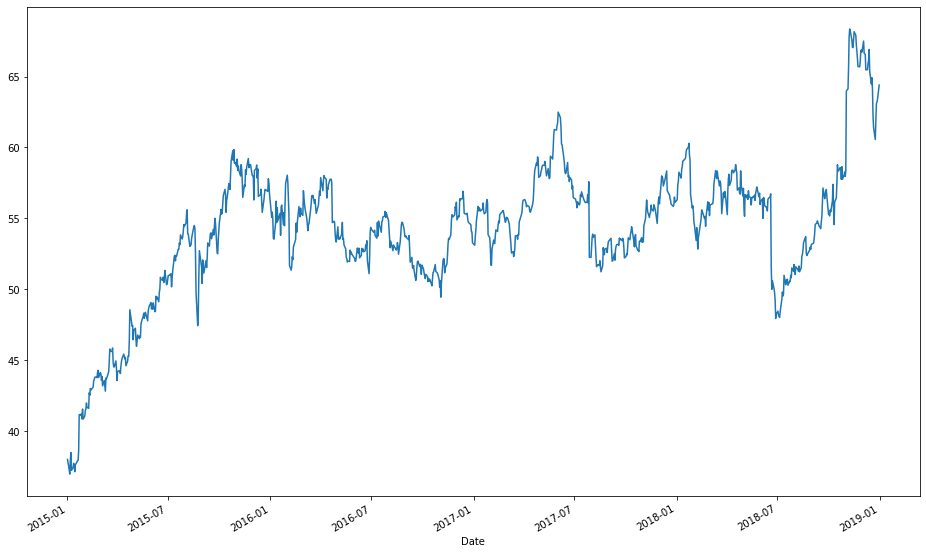

In [43]:
data['Close'].plot(figsize=(16,10))

In [46]:
data.rolling(window=7).mean().head(10)
# first saven column value to be null. passing window is 7
# so need first saven row to first mean value

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


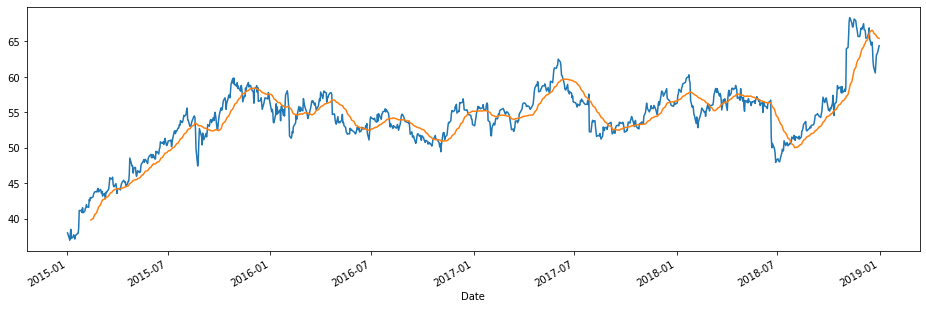

In [51]:
# close data
data['Close'].plot(figsize=(16, 5))
# mean
data.rolling(window=30).mean()['Close'].plot()

**Expanding**

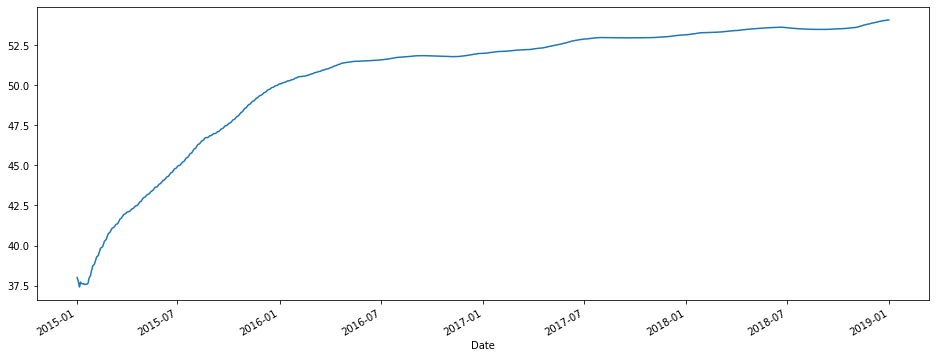

In [53]:
data['Close'].expanding().mean().plot(figsize=(16,6))

**Visualization**

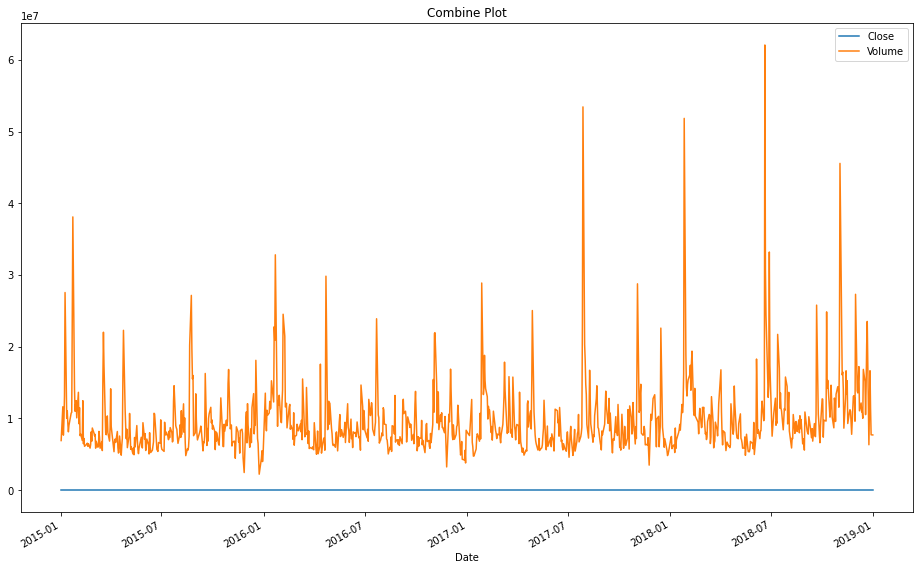

In [65]:
data.plot(figsize=(16,10), title="Combine Plot")

[Text(0, 0.5, 'Close Price')]

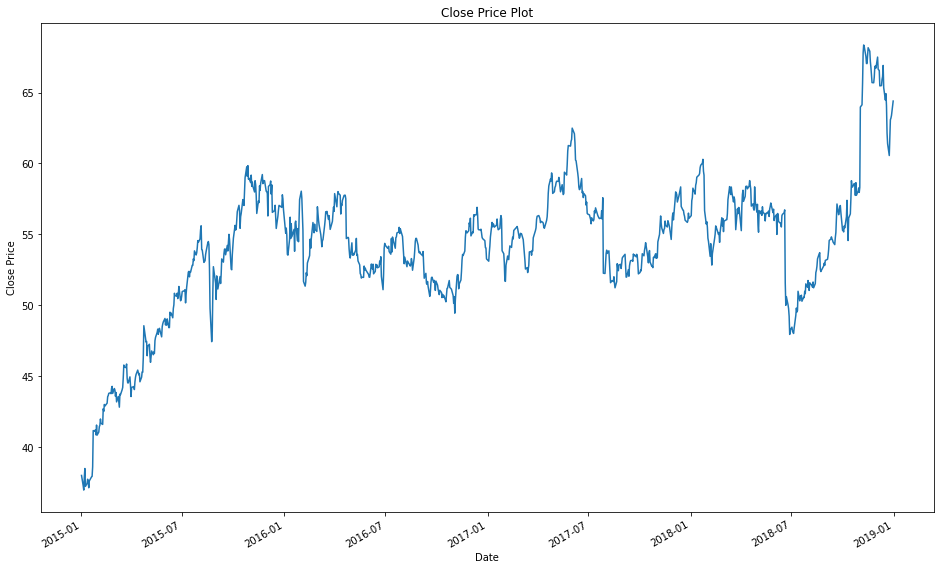

In [68]:
ax = data['Close'].plot(figsize=(16,10), title="Close Price Plot")
ax.autoscale()
ax.set(ylabel="Close Price")

[Text(0, 0.5, 'Volume')]

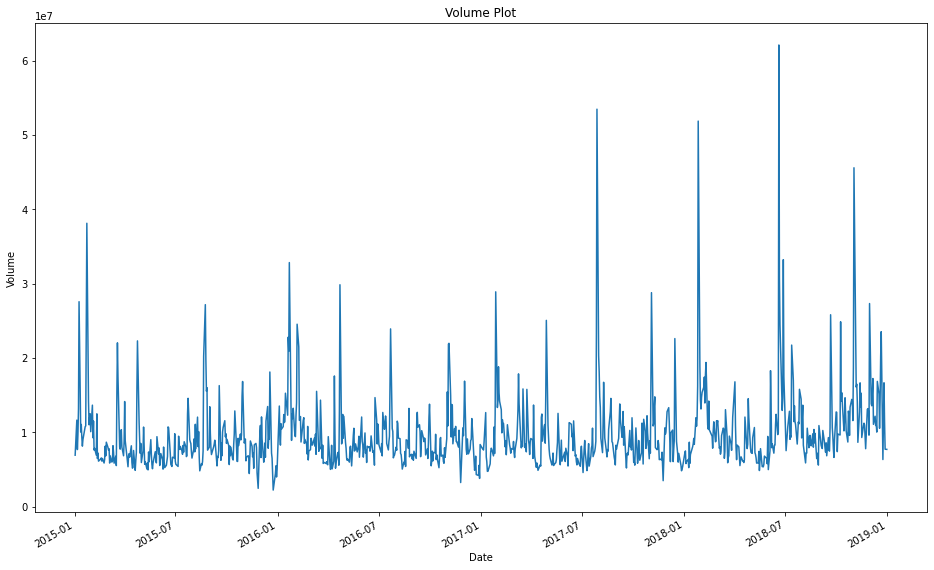

In [71]:
ax = data['Volume'].plot(figsize=(16,10), title="Volume Plot")
ax.autoscale()
ax.set(ylabel="Volume")

[Text(0, 0.5, 'Close Price')]

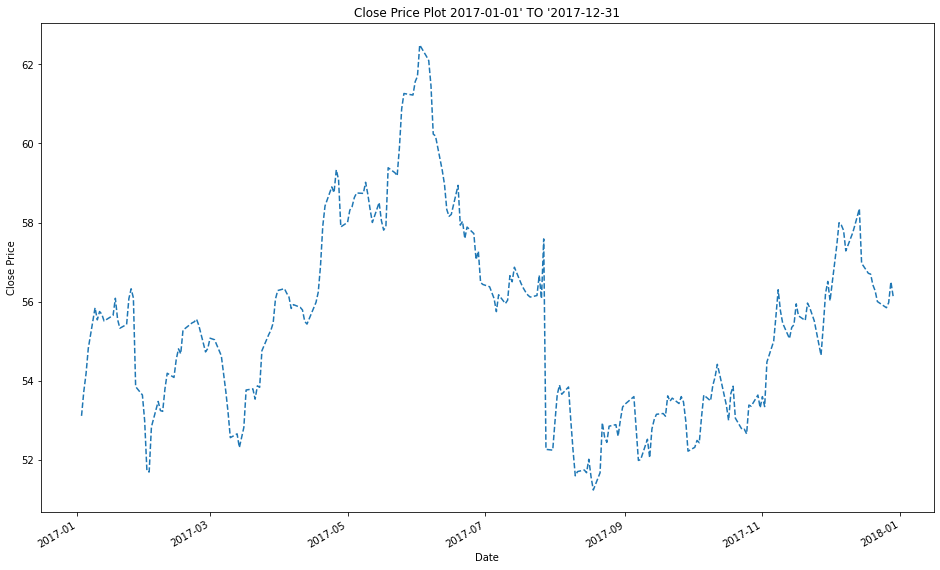

In [81]:
ax = data['Close']['2017-01-01':'2017-12-31'].plot(figsize=(16,10), title="Close Price Plot 2017-01-01' TO '2017-12-31", ls='--')
ax.autoscale()
ax.set(ylabel="Close Price")

# or

# ax = data['Close'].plot(figsize=(16,10),xlim=['2017-01-01', '2017-12-31'], title="Close Price Plot 2017-01-01' TO '2017-12-31")
# ax.autoscale()
# ax.set(ylabel="Close Price")

**UsingMatplotLib Dates**

**Axis base date Formating adjustment**

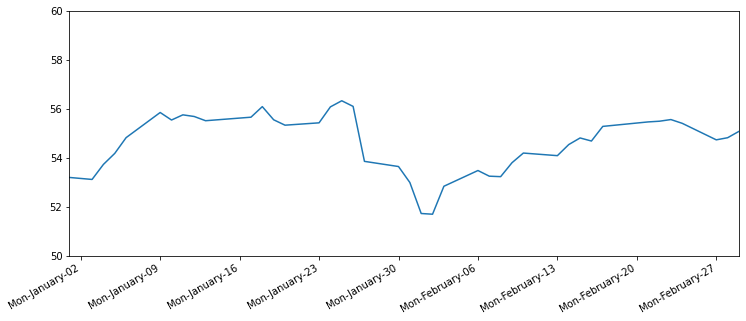

In [97]:
ax = data['Close'].plot(figsize=(12, 5), xlim=['2017-01-01','2017-03-01'], ylim=[50,60])
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

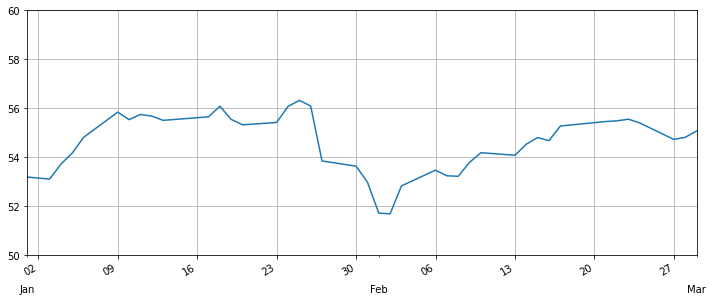

In [101]:
ax = data['Close'].plot(figsize=(12, 5), xlim=['2017-01-01','2017-03-01'], ylim=[50,60])
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%d"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("\n\n%b"))

ax.yaxis.grid(True)
ax.xaxis.grid(True)